In [1]:
import IPython
from pvrecorder import PvRecorder
import wave
import struct
import time
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
recorder = PvRecorder(device_index=0, frame_length=512)
sound = []

recorder.start()
print('recording')
t_0 = time.time()
while time.time()-t_0<4:
    frame = recorder.read()
    sound.extend(frame)
        # Do something ...
recorder.stop()
recorder.delete()
fs = 16000


recording


In [3]:
path = 'test.wav' 
with wave.open(path, 'w') as f:
                    f.setparams((1, 2, fs, 512, "NONE", "NONE"))
                    f.writeframes(struct.pack("h" * len(sound), *sound))

In [4]:
data = np.array(sound).astype(np.int16)
for i in range(100):
    fft = np.fft.fft(data)*0.1
    data = np.fft.ifft(fft)
    data = ((2**(16-4)) * data/data.max()).astype(np.int16)
   

/var/folders/q8/9dhs6y4d21s87vxtnwqflq5m0000gn/T/ipykernel_6252/534606777.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  data = ((2**(16-4)) * data/data.max()).astype(np.int16)


In [5]:
data = np.array(sound).astype(np.int16)
fft = np.fft.fft(data)
fft

array([-1.60902980e+07     +0.j        ,  4.12056323e+04 +90765.10845954j,
       -7.34144526e+04-162479.63500145j, ...,
       -3.35557900e+03 +57313.54923878j, -7.34144526e+04+162479.63500145j,
        4.12056323e+04 -90765.10845954j])

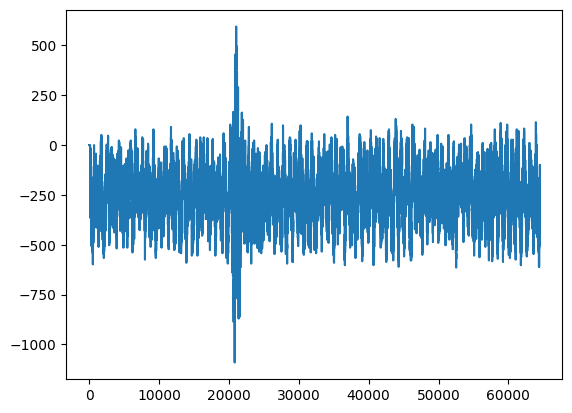

In [6]:
plt.plot(data)

/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


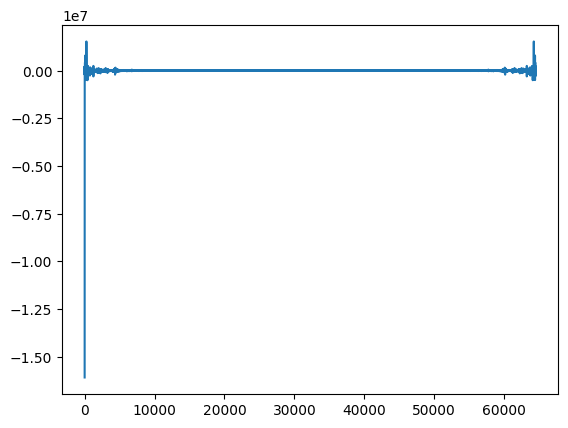

In [7]:
plt.plot(fft)
  

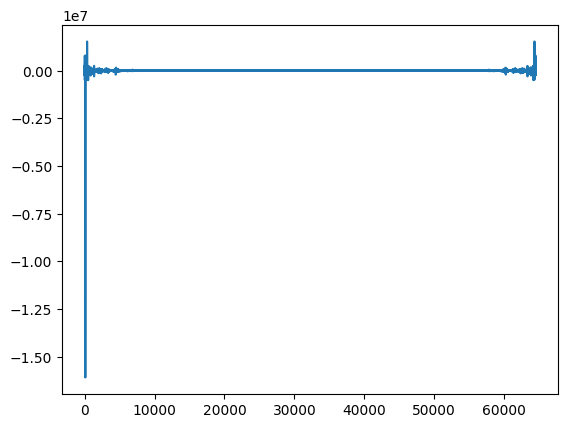

In [8]:
roll = np.roll(fft,100)
plt.plot(roll)

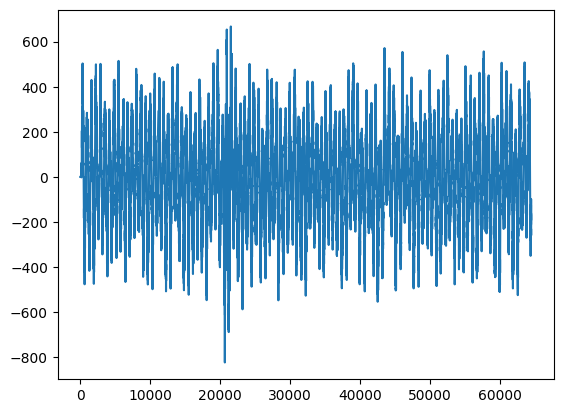

In [9]:
ifft = np.fft.ifft(roll)
plt.plot(ifft)

In [10]:
fft

array([-1.60902980e+07     +0.j        ,  4.12056323e+04 +90765.10845954j,
       -7.34144526e+04-162479.63500145j, ...,
       -3.35557900e+03 +57313.54923878j, -7.34144526e+04+162479.63500145j,
        4.12056323e+04 -90765.10845954j])

In [11]:
roll = np.roll(fft,10)
data = np.fft.ifft(roll)
data = ((2**(16-4)) * data/data.max()).astype(np.int16)

/var/folders/q8/9dhs6y4d21s87vxtnwqflq5m0000gn/T/ipykernel_6252/3895190541.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  data = ((2**(16-4)) * data/data.max()).astype(np.int16)


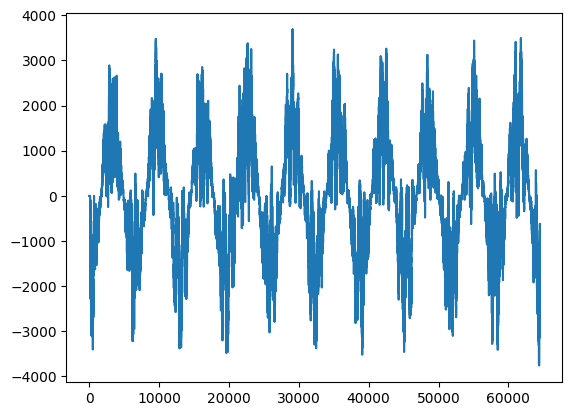

In [12]:
plt.plot(data*0.9)

In [13]:
!env | grep env

PYENV_ROOT=/Users/fridadesigley/.pyenv
VIRTUAL_ENV=/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico
PYENV_VIRTUAL_ENV=/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico
PATH=/Users/fridadesigley/.pyenv/versions/pico/bin:/usr/local/opt/pyenv/libexec:/usr/local/opt/pyenv/plugins/python-build/bin:/Users/fridadesigley/google-cloud-sdk/bin:/opt/homebrew/bin:/Users/fridadesigley/.pyenv/shims:/usr/local/Cellar/pyenv-virtualenv/1.1.5/shims:/usr/local/bin:/usr/local/sbin:/Users/fridadesigley/.pyenv86/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/local/sbin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
PYENV_HOOK_PATH=/Users/fridadesigley/.pyenv/pyenv.d:/usr/local/opt/pyenv/pyenv.d:/usr/local/etc/pyenv.d:/etc/pyenv.d:/usr/lib/pyenv/hooks:/Users/fridadesigley/.pyenv/plugins/pyenv-alias/etc/pyenv.d
_=/usr/bin/env


In [14]:
from scipy.io.wavfile import read
import wave
import struct
import ipywidgets as widgets
import IPython
from pvrecorder import PvRecorder
import wave
import struct
import time
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [33]:
class Response:
    def __init__(self,frame):
        self.frame_length=frame
        self.path =  './test.wav'
        self.t_delta=1
        self.fs = 16000
        self.root = Path('./')
        
    def set_time(self,delta_sec:int):
        self.t_delta=delta_sec
    
    def createdirs(self):
        if not self.dir.exists():
            self.dir.mkdir(exist_ok=True)
        for sound_class in self.class_dirs:
            sound_dir = self.dir/sound_class
            sound_dir.mkdir(exist_ok=True)

            
    def get_classes(self,sound_classes:tuple[str,str]):
        self.dir = self.root/'data'  
        self.class_dirs = sound_classes
        self.createdirs()
        self.classes={sound:{'class':idx,'count':len(list((self.dir/sound).iterdir()))} for idx,sound in enumerate(sound_classes)}
        print(self.classes)
        self.set_widgets()
        
        
    def set_widgets(self):
        
        actions=[
            widgets.Button(description=f'record {name}') for name,entry in self.classes.items()]
        for act in actions:
            act.on_click(self.record)
            
            
        save = widgets.Button(description='save \U0001F4BE')
        play = widgets.Button(description='play ▶️')
        
        delete = widgets.Button(description='delete \U0000274C')
        save.on_click(self.save)
        play.on_click(self.play)
        delete.on_click(self.drop_recording)
        self.out = widgets.Output()
        actions+=[play,save,delete,self.out]
        acts = tuple(actions)
        self.vbox=widgets.VBox(children=acts)
        display(self.vbox)
        
    def record(self,button:widgets.Button):
        with self.out:
            key = button.description.split(' ')[1]
            self.state = key
            self.classes[key]['count']+=1
            self.classes[key][f'record {self.classes[key]["count"]}']=np.array([])
#             print(dir(self.out))
#             print(self.out._Output__counter)
            self.recorder = PvRecorder(device_index=0, frame_length=self.frame_length)
            self.recorder.start()
            t_0 = time.time()
            record = np.array([]).astype(np.int16)
            while time.time()-t_0<self.t_delta:
                frame = self.recorder.read()
                record = np.append(record,np.array(frame)).astype(np.int16)
            self.recorder.stop()
            self.recorder.delete()
            self.classes[key][f'record {self.classes[key]["count"]}']=record
            

    def save(self,_):
        path = self.root/'data'
        if not path.exists():
            path.mkdir(exist_ok=True)
        with self.out:
            for state in self.classes:
                class_dir = path/state
                if not class_dir.exists():
                    class_dir.mkdir(exist_ok=True)
                for key in self.classes[state]:
                    if 'record' in key:
                        rec = self.classes[state][key]
                        fid = class_dir/f'{state}_{key}.wav'
                        with wave.open(str(fid), 'w') as f:
                            f.setparams((1, 2, self.fs, 512, "NONE", "NONE"))
                            f.writeframes(struct.pack("h" * len(rec), *rec))
        
    def play(self,_):
        try:
            count = self.classes[self.state]['count']
            print(self.classes[self.state][f'record {count}'])
            for key in self.classes[self.state]:
                if 'record' in key:
                    sd.play(self.classes[self.state][key], self.fs)
                    sd.wait()
        except(KeyError,AttributeError):
            print('no recordings')

    def drop_recording(self,_):
        try:
            if self.classes[self.state]['count']!=0:
                self.classes[self.state].popitem()
                self.classes[self.state]['count']-=1
        except(KeyError,AttributeError):
            print('no recordings')

In [34]:
!rm -rf data

In [36]:
sample = Response(frame=512)
sample.set_time(delta_sec=1)
sample.get_classes(('yes','no','background'))


{'yes': {'class': 0, 'count': 0}, 'no': {'class': 1, 'count': 0}, 'background': {'class': 2, 'count': 0}}


[   0    0    0 ... -203 -255 -219]
[   0    0    0 ...  -91 -179 -191]
[   0    0    0 ...  -91 -179 -191]
[   0    0    0 ...  -91 -179 -191]
[   0    0    0 ...  -91 -179 -191]
[   0    0    0 ...  -91 -179 -191]


In [37]:
import wave
import numpy as np
import matplotlib.pyplot as plt
def read_wav(fid:str):
    # Read file to get buffer                                                                                               
    ifile = wave.open(fid)
    samples = ifile.getnframes()
    audio = ifile.readframes(samples)

    # Convert buffer to float32 using NumPy                                                                                 
    audio_as_np_int16 = np.frombuffer(audio, dtype=np.int16)
    return audio_as_np_int16

In [38]:
!pwd

/Users/fridadesigley/pico/audio-classifier


In [30]:
 !mkdir datasets
 !wget 'https://github.com/karoldvl/ESC-50/archive/master.zip' -P ~/pico/audio-classifier/datasets
 !unzip -q ~/datasets/master.zip -d ./datasets/

mkdir: datasets: File exists
--2023-01-13 13:29:05--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2023-01-13 13:29:05--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2023-01-13 13:29:05--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/Users/frida

In [74]:
import pandas as pd
esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

df = pd.read_csv(esc50_csv)
df.head(100)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
95,1-20133-A-39.wav,1,39,glass_breaking,False,20133,A
96,1-202111-A-3.wav,1,3,cow,False,202111,A
97,1-20545-A-28.wav,1,28,snoring,False,20545,A
98,1-20736-A-18.wav,1,18,toilet_flush,False,20736,A


In [40]:
import tensorflow as tf
import tensorflow_io as tfio

In [42]:
sample_rate = 16000
chans = 1
sound = read_wav('./data/no/no_record 1.wav')
sound = sound.astype(np.float32, order='F') / 32768.0


In [67]:
file_contents = tf.io.read_file('./data/yes/yes_record 1.wav')
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=chans)
squeeze_wav = tf.squeeze(wav, axis=-1)
spect = tf.signal.stft(squeeze_wav, frame_length=512, frame_step=128)


In [68]:
wav

<tf.Tensor: shape=(16384, 1), dtype=float32, numpy=
array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.1545105 ],
       [-0.0484314 ],
       [-0.09030151]], dtype=float32)>

In [45]:
import scipy

In [46]:
!pip install cmsisdsp

In [47]:
import cmsisdsp
from numpy import pi as PI

window_size = 512
step_size = 64

hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
  hanning_window_f32[i] = 0.5 * (1 - cmsisdsp.arm_cos_f32(2 * PI * i / window_size ))
hanning_window_q15 = cmsisdsp.arm_float_to_q15(hanning_window_f32)
rfftq15 = cmsisdsp.arm_rfft_instance_q15()
status = cmsisdsp.arm_rfft_init_q15(rfftq15, window_size, 0, 1)

def get_arm_spectrogram(waveform):
  num_frames = int(1 + (len(waveform) - window_size) // step_size)
  fft_size = int(window_size // 2 + 1)
  # Convert the audio to q15
  waveform_q15 = cmsisdsp.arm_float_to_q15(waveform)
  # Create empty spectrogram array
  spectrogram_q15 = np.empty((num_frames, fft_size), dtype = np.int16)
  start_index = 0
  for index in range(num_frames):
    # Take the window from the waveform.
    window = waveform_q15[start_index:start_index + window_size]
    # Apply the Hanning Window.
    window = cmsisdsp.arm_mult_q15(window, hanning_window_q15)
    # Calculate the FFT, shift by 7 according to docs
    window = cmsisdsp.arm_rfft_q15(rfftq15, window)
    # Take the absolute value of the FFT and add to the Spectrogram.
    spectrogram_q15[index] = cmsisdsp.arm_cmplx_mag_q15(window)[:fft_size]
    # Increase the start index of the window by the overlap amount.
    start_index += step_size
  # Convert to numpy output ready for keras
  return cmsisdsp.arm_q15_to_float(spectrogram_q15).reshape(num_frames,fft_size) * 512

In [48]:
spct = get_arm_spectrogram(wav)

In [70]:
spect

<tf.Tensor: shape=(125, 257), dtype=complex64, numpy=
array([[-2.4648588e+00+0.00000000e+00j,  1.6521215e+00-2.97893584e-01j,
        -4.8636401e-01-1.60223335e-01j, ...,
         2.4107248e-03+5.06993383e-03j,  7.2792172e-03-4.86809015e-03j,
        -1.3364792e-02+0.00000000e+00j],
       [-2.3819079e+00+0.00000000e+00j,  1.2134604e+00+3.93426299e-01j,
        -4.2512074e-02-1.31129757e-01j, ...,
         3.4686886e-03-4.17924672e-03j,  5.3901076e-03+1.58959627e-03j,
        -9.6936226e-03+0.00000000e+00j],
       [-1.5755328e+00+0.00000000e+00j,  7.8935242e-01+3.80635768e-01j,
        -1.7849409e-03-2.29915436e-02j, ...,
        -7.2559351e-03+1.51462825e-02j,  8.3303452e-04-1.18056983e-02j,
         8.7738037e-04+0.00000000e+00j],
       ...,
       [-7.8738685e+00+0.00000000e+00j,  3.8122842e+00+4.14406681e+00j,
         8.2251108e-01-2.61707687e+00j, ...,
        -1.6115049e-01+2.64689088e-01j,  2.6828194e-01-2.71353960e-01j,
        -4.2787600e-01+0.00000000e+00j],
       [-2.996

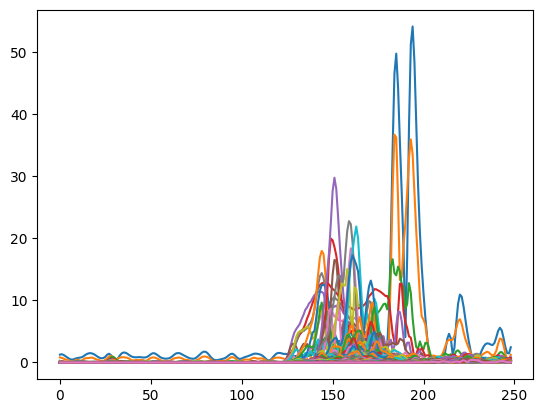

In [69]:
plt.plot(spct)

In [55]:
!pip install pydub

In [134]:
fid = "./datasets/ESC-50-master/audio/1-100032-A-0.wav"
# times between which to extract the wave from
start = 0 # seconds
end = 1 # seconds

def segment(fid:str, chunk:int):
    # file to extract the snippet from
    data = [ ]
    with wave.open(fid, "rb") as infile:
        # get file data
        nchannels = infile.getnchannels()
        sampwidth = infile.getsampwidth()
        framerate = infile.getframerate()
        # set position in wave to start of segment
        for sec in range(4):
            infile.setpos(int(sec * framerate))
            data.append(infile.readframes(chunk * framerate))   
    return data, (nchannels, sampwidth , framerate)
        

In [135]:
data = segment(fid = "./datasets/ESC-50-master/audio/1-100032-A-0.wav",
       chunk=1)

in_paranet = Path('./datasets/ESC-50-master/audio/')
out_data_dir = Path('ESC-50')
out_data_dir.mkdir(exist_ok=True)
all_out = [ ]
for idx, row in df.iterrows():
    out_dir = out_data_dir/row.category
    out_dir.mkdir(exist_ok=True)
    data, vals = segment(fid = str(in_paranet/row.filename),
       chunk=1)
    chans, samp_width , rate = vals
    out_fids = [ ]
    for idx,sound in enumerate(data):
        out_fid = out_dir/f'{idx}_{row.filename}'
        out_fids.append(out_fid)
        with wave.open(str(out_fid), 'w') as outfile:
            outfile.setnchannels(chans)
            outfile.setsampwidth(samp_width)
            outfile.setframerate(rate)
            outfile.setnframes(int(len(sound_bytes) / sampwidth))
            outfile.writeframes(sound_bytes)
    all_out.append(out_fids)
        
    
    
    

In [136]:
df['all_out']=all_out 


# Data table for sound Wandb table with 

> 1. ouriginal sound string
> 2. playable sound file
> 3. 4 * 1 second clips files
> 4  4 * 1 second clips files

# Sound and Spectrogram Table



In [137]:
df

,filename,fold,target,category,esc10,src_file,take,one_secon_files,all_out
0,1-100032-A-0.wav,1,0,dog,True,100032,A,"[ESC-50/dog/0_1-100032-A-0.wav, ESC-50/dog/1_1...","[ESC-50/dog/0_1-100032-A-0.wav, ESC-50/dog/1_1..."
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,"[ESC-50/chirping_birds/0_1-100038-A-14.wav, ES...","[ESC-50/chirping_birds/0_1-100038-A-14.wav, ES..."
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,"[ESC-50/vacuum_cleaner/0_1-100210-A-36.wav, ES...","[ESC-50/vacuum_cleaner/0_1-100210-A-36.wav, ES..."
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,"[ESC-50/vacuum_cleaner/0_1-100210-B-36.wav, ES...","[ESC-50/vacuum_cleaner/0_1-100210-B-36.wav, ES..."
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,"[ESC-50/thunderstorm/0_1-101296-A-19.wav, ESC-...","[ESC-50/thunderstorm/0_1-101296-A-19.wav, ESC-..."
...,...,...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B,"[ESC-50/hen/0_5-263831-B-6.wav, ESC-50/hen/1_5...","[ESC-50/hen/0_5-263831-B-6.wav, ESC-50/hen/1_5..."
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A,"[ESC-50/vacuum_cleaner/0_5-263902-A-36.wav, ES...","[ESC-50/vacuum_cleaner/0_5-263902-A-36.wav, ES..."
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A,"[ESC-50/footsteps/0_5-51149-A-25.wav, ESC-50/f...","[ESC-50/footsteps/0_5-51149-A-25.wav, ESC-50/f..."
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A,"[ESC-50/sheep/0_5-61635-A-8.wav, ESC-50/sheep/...","[ESC-50/sheep/0_5-61635-A-8.wav, ESC-50/sheep/..."


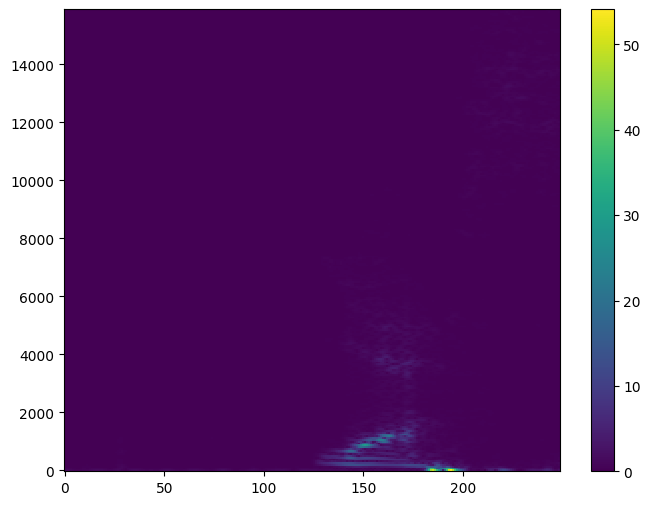

In [49]:

def plot_spectrogram(spectrogram,sample_rate, vmax=None):
  transposed_spectrogram = tf.transpose(spectrogram)

  fig = plt.figure(figsize=(8,6))
  height = transposed_spectrogram.shape[0]
  X = np.arange(transposed_spectrogram.shape[1])
  Y = np.arange(height * int(sample_rate / 256), step=int(sample_rate / 256))

  im = plt.pcolormesh(X, Y, tf.transpose(spectrogram), vmax=vmax)

  fig.colorbar(im)
  plt.show()


plot_spectrogram(spct,16000)

In [50]:
# Maximum duration of the input audio file we feed to our Wav2Vec 2.0 model.
MAX_DURATION = 1
# Sampling rate is the number of samples of audio recorded every second
DIRECTORY = './datasets/ESC-50-master/audio/'
SAMPLING_RATE = 16000
BATCH_SIZE = 32  # Batch-size for training and evaluating our model.
NUM_CLASSES = 10  # Number of classes our dataset will have (11 in our case).
HIDDEN_DIM = 768  # Dimension of our model output (768 in case of Wav2Vec 2.0 - Base).
MAX_SEQ_LENGTH = MAX_DURATION * SAMPLING_RATE  # Maximum length of the input audio file.
# Wav2Vec 2.0 results in an output frequency with a stride of about 20ms.
MAX_FRAMES = 49
MAX_EPOCHS = 2  # Maximum number of training epochs.

MODEL_CHECKPOINT = "facebook/wav2vec2-base"  # Name of pretrained model from Hugging Face Model Hub

In [52]:
!ls './datasets/ESC-50-master/audio/'

1-100032-A-0.wav  2-118624-A-30.wav 3-151212-A-24.wav 4-196671-A-8.wav
1-100038-A-14.wav 2-118625-A-30.wav 3-151213-A-24.wav 4-196671-B-8.wav
1-100210-A-36.wav 2-118817-A-32.wav 3-151255-A-28.wav 4-196672-A-8.wav
1-100210-B-36.wav 2-118964-A-0.wav  3-151269-A-35.wav 4-197103-A-6.wav
1-101296-A-19.wav 2-119102-A-21.wav 3-151273-A-35.wav 4-197454-A-28.wav
1-101296-B-19.wav 2-119139-A-31.wav 3-151557-A-28.wav 4-197454-B-28.wav
1-101336-A-30.wav 2-119161-A-8.wav  3-151557-B-28.wav 4-197871-A-15.wav
1-101404-A-34.wav 2-119161-B-8.wav  3-152007-A-20.wav 4-198025-A-23.wav
1-103298-A-9.wav  2-119161-C-8.wav  3-152007-B-20.wav 4-198360-A-49.wav
1-103995-A-30.wav 2-119748-A-38.wav 3-152007-C-20.wav 4-198360-B-49.wav
1-103999-A-30.wav 2-120218-A-30.wav 3-152007-D-20.wav 4-198360-C-49.wav
1-104089-A-22.wav 2-120218-B-30.wav 3-152007-E-20.wav 4-198841-A-37.wav
1-104089-B-22.wav 2-120333-A-32.wav 3-152020-A-36.wav 4-198962-A-25.wav
1-105224-A-22.wav 2-120586-A-6.wav  3-152020-B-36.wav 4-198962-B-25.

Found 0 files belonging to 0 classes.


ValueError: No audio files found in directory ./datasets/ESC-50-master/audio/. Allowed format(s): ('.wav',)

Model

In [ ]:
baseline_model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.experimental.preprocessing.Resizing(32, 32, interpolation="nearest"), 
  norm_layer,
  tf.keras.layers.Conv2D(8, kernel_size=(8,8), strides=(2, 2), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50, activation='softmax')
])

baseline_model.summary()